In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets=pd.read_csv("Elon_musk.csv",encoding='Latin1',error_bad_lines=False)

In [3]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets.drop(["Unnamed: 0"],inplace=True,axis=1)

In [5]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Processing

In [6]:
# remove both the leading and the trailing characters
# removes empty strings
tweets=[Text.strip() for Text in tweets.Text] 
tweets=[Text for Text in tweets if Text] 
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
# joining list into one string 
tweets_text=''.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [8]:
# Tokenizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [9]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley It \x92 s getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto w

In [10]:
# remove Twitter username handles from a given twiter text(remove @username)
import re
tweets_text=re.sub('@[^\s]+','',tweets_text)
tweets_text= re.sub('@[\w]+','',tweets_text)

In [11]:
tweets_text

' I\x92m an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?  Great interview! Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM   Haha thanks :)  Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely Just sent someJust agree to do Clubhouse with   It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923><U+0001F923>This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucksRT  NASA has selected Falcon Heavy to launch the first two elements of the lunar G

In [12]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '',tweets_text)
no_url_text

' I\x92m an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?  Great interview! Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox!  was the underdoge,\nAll thought he would fail,\nHimself most of all.    Haha thanks :)  Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely Just sent someJust agree to do Clubhouse with   It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923><U+0001F923>This is true power haha  Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucksRT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!  Yes   Once we can predict cash flow reaso

In [13]:
no_punc_text = no_url_text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

' I\x92m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it  Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox  was the underdoge\nAll thought he would fail\nHimself most of all    Haha thanks   Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely Just sent someJust agree to do Clubhouse with   It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923U0001F923This is true power haha  Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucksRT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission  Yes   Once we can predict cash flow reasonably well Starlink will 

# Tokenization

In [14]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)


['I\x92m', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'Haha', 'thanks', ':', ')', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It\x92s', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', ',', 'but', 'the', 'sentencing', 'seems', 'a', 

In [15]:
# Tokens count
len(text_tokens)

19823

# Removing Stopword

In [16]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','u+0001f923','U+0001F923','haha','amp']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['I\x92m', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', 'Great', 'interview', '!', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'Haha', 'thanks', ':', ')', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation.The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'It\x92s', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', ',', 'toddler', 'hodler', 'He', 'definitely', 'issues', ',', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', '<', '>', '<', '>', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucksRT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', '

# Noramalize the data 

In [17]:

lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['costs', 'your', 'app', 'sucksrt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', '!', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', ',', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', '&', ';', 'economic', 'endeavor', '.', 'however', ',', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', ',', 'net', 'value', 'product', 'made', '.', 'must', 'scalable', 'g', 'it\x92s', 'meant', 'price', 'countries', '.', 'only', 'difference', 'taxes', '&', ';', 'shipping', '.', 'this', 'intended', 'earth', ',', 'may', 'ideas', 'apply', 'mars', '<', '>', '<', '>', 'xprize', 'team', 'manage', '$', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', '.']


# Stemming

In [18]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['cost', 'your', 'app', 'sucksrt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', '!', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', ',', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', '&', ';', 'econom', 'endeavor', '.', 'howev', ',', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', ',', 'net', 'valu', 'product', 'made', '.', 'must', 'scalabl', 'g', 'it\x92', 'meant', 'price', 'countri', '.', 'onli', 'differ', 'tax', '&', ';', 'ship', '.', 'thi', 'intend', 'earth', ',', 'may', 'idea', 'appli', 'mar', '<', '>', '<', '>', 'xprize', 'team', 'manag', '$', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', '.']


# # Lemmatization

In [19]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

im alien ray tracing cyberpunk hdr next-level . have tried ? great interview ! doge underestimated congratulations tesla china amazing execution last year . now next even ! ! happy new year ox ! underdoge , all thought would fail , himself . haha thanks : ) indeed ! tweets definitely represent real-world time allocation.the entertaining outcome likely just sent somejust agree clubhouse its getting realbought dogecoin lil x , toddler hodler he definitely issues , sentencing seems bit high thanks fixing please unlock account < > < > this true power any crypto wallet wont give private keys avoided costs your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission ! once predict cash flow reasonably well , starlink ipo starlink staggeringly difficult technical & ; economic endeavor . however , spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered , net value product made . must scalable g its meant p

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['i\x92m', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'next', '-', 'level', '.', 'have', 'try', '?', 'great', 'interview', '!', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'underdoge', ',', 'all', 'thought', 'would', 'fail', ',', 'himself', '.', 'haha', 'thank', ':', ')', 'indeed', '!', 'tweet', 'definitely', 'represent', 'real', '-', 'world', 'time', 'allocation.the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'it\x92s', 'getting', 'realbought', 'dogecoin', 'lil', 'x', ',', 'toddler', 'hodler', 'he', 'definitely', 'issue', ',', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', '<', '>', '<', '>', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'sucksrt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'firs

In [21]:
clean_tweets=' '.join(lemmas)
clean_tweets

"i\x92m alien ray trace cyberpunk hdr next - level . have try ? great interview ! doge underestimate congratulation tesla china amazing execution last year . now next even ! ! happy new year ox ! underdoge , all thought would fail , himself . haha thank : ) indeed ! tweet definitely represent real - world time allocation.the entertaining outcome likely just send somejust agree clubhouse it\x92s getting realbought dogecoin lil x , toddler hodler he definitely issue , sentencing seem bit high thank fix please unlock account < > < > this true power any crypto wallet won\x92t give private key avoid cost your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission ! once predict cash flow reasonably well , starlink ipo starlink staggeringly difficult technical & ; economic endeavor . however , spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester , net value product make . must scalable g it\x92s mean price countr

# Feature Extaction

# 1. Using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'alien': 284, 'ray': 2493, 'trace': 3180, 'cyberpunk': 865, 'hdr': 1478, 'next': 2094, 'level': 1806, 'have': 1473, 'try': 3216, 'great': 1417, 'interview': 1677, 'doge': 992, 'underestimate': 3257, 'congratulation': 769, 'tesla': 3080, 'china': 677, 'amazing': 306, 'execution': 1163, 'last': 1772, 'year': 3489, 'now': 2124, 'even': 1137, 'happy': 1460, 'new': 2092, 'ox': 2227, 'underdoge': 3256, 'all': 286, 'thought': 3119, 'would': 3475, 'fail': 1197, 'himself': 1515, 'haha': 1442, 'thank': 3089, 'indeed': 1611, 'tweet': 3229, 'definitely': 905, 'represent': 2559, 'real': 2503, 'world': 3470, 'time': 3136, 'allocation': 288, 'the': 3094, 'entertaining': 1106, 'outcome': 2205, 'likely': 1823, 'just': 1724, 'send': 2705, 'somejust': 2841, 'agree': 267, 'clubhouse': 707, 'it': 1700, 'getting': 1374, 'realbought': 2504, 'dogecoin': 995, 'lil': 1827, 'toddler': 3148, 'hodler': 1520, 'he': 1479, 'issue': 1697, 'sentencing': 2711, 'seem': 2700, 'bit': 511, 'high': 1511, 'fix': 1260, 'pleas

In [24]:
print(cv.get_feature_names()[100:200])

['1st', '1stout', '20', '200', '2007', '2008', '2009', '200d', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '2192', '21st', '22', '225', '23', '230', '24', '25', '250', '250kw', '25guns', '25k', '25th', '2600', '263a', '2640', '2660', '2665', '26a1', '27', '2705', '27pm', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '30m', '30pm', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3model', '3rd', '40', '400', '40am', '40pm', '40solve', '42', '420', '422', '430', '43rd', '45pm', '4680', '479', '48', '49', '4d', '50', '50k', '530', '5d', '60', '65', '69', '6f', '6ki', '74', '78', '7th', '90', '9007', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort']


In [25]:
print(tweetscv.toarray()[100:200])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(tweetscv.toarray().shape)

(14327, 3519)


# N gram

In [27]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [28]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'don', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'it', 'land', 'launch', 'life', 'like', 'long', 'look', 'lot', 'make', 'many', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 're', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'use', 'way', 'we', 'we re', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFidf vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [30]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['000', '0001f3b6', '0001f440', '0001f495', '0001f525', '0001f5a4', '0435', '043b', '043e', '10', '100', '20', '2020', '2192', '30', '40', '4d', '50', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'appear', 'apply', 'appreciate', 'approval', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'case', 'catch', 'cell', 'ch4', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov2', 'create', 'crew', 'critical', 'curevac', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', '

# Generate Word Cloud


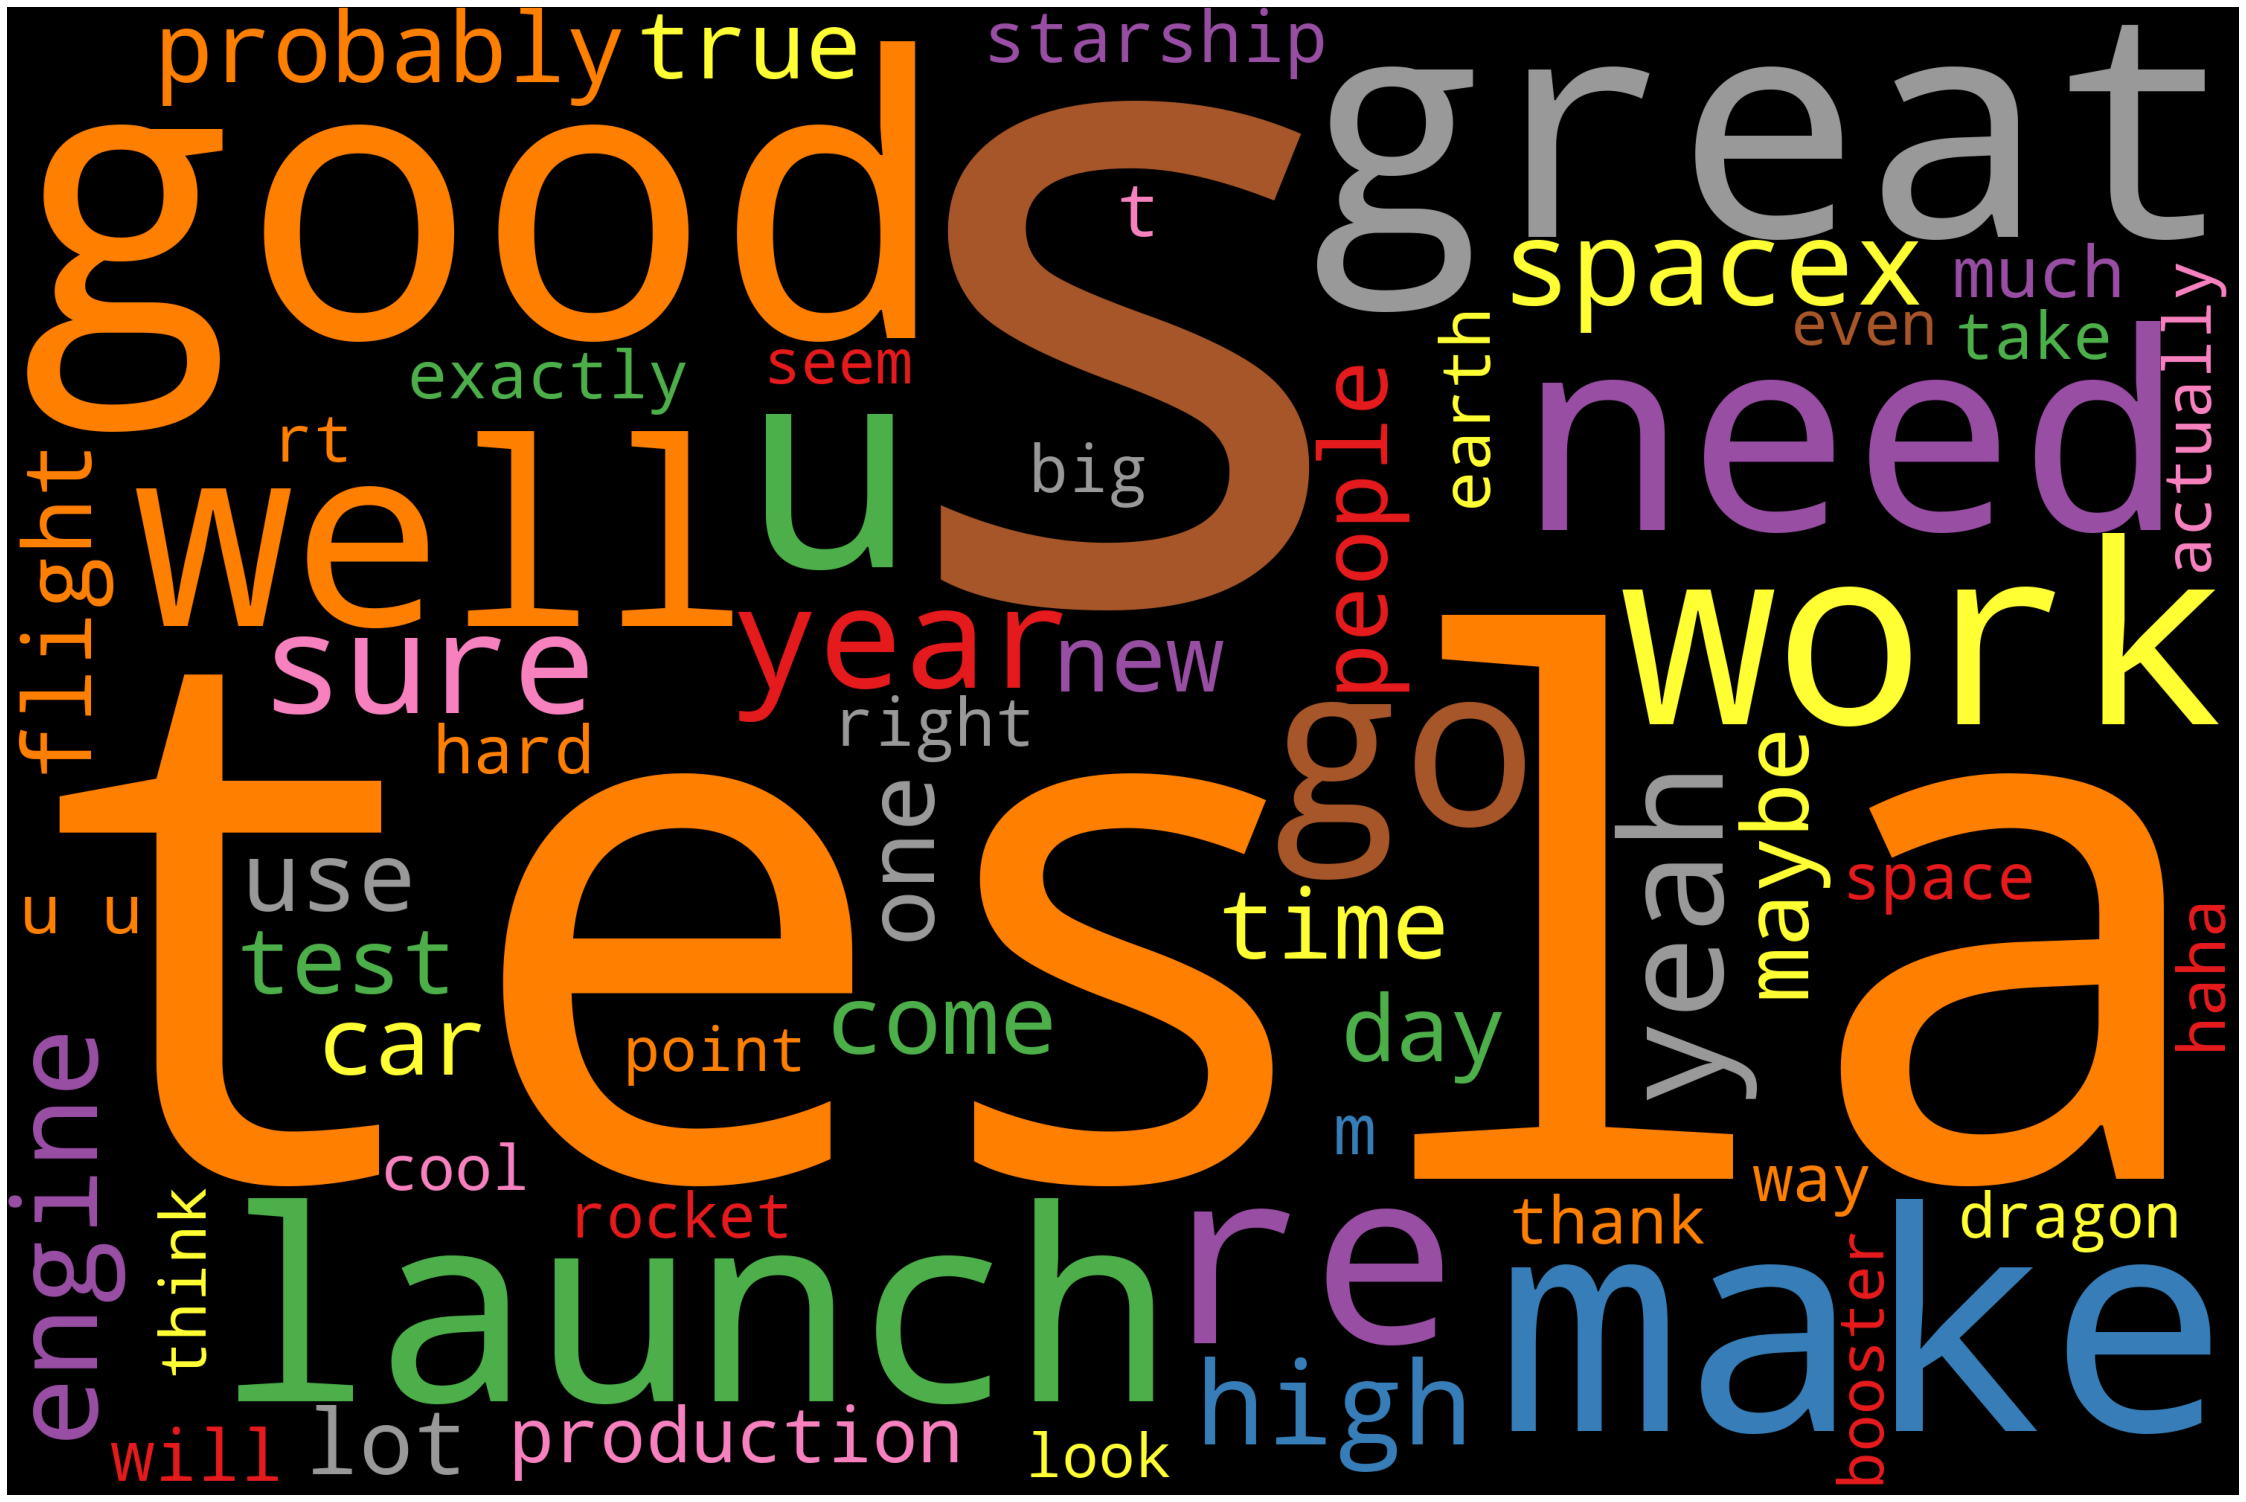

In [31]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=60,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)


In [32]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)  

give VERB
private ADJ
key NOUN
avoid NOUN
cost VERB
your PRON
app NOUN
sucksrt NOUN
nasa PROPN
select PROPN
falcon PROPN
heavy ADJ
launch NOUN
first ADV
two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
! PUNCT
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
, PUNCT
starlink VERB
ipo NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
& CCONJ
; PUNCT
economic ADJ
endeavor NOUN
. PUNCT
however ADV
, PUNCT
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
, PUNCT
net ADJ
value NOUN
product NOUN
make VERB
. PUNCT
must AUX
scalable VERB
g NOUN
its ADJ
mean ADJ
price NOUN
country NOUN
. PUNCT
only ADV
difference NOUN
taxis NOUN
& CCONJ
; PUNCT
shipping NOUN
. PUNCT
this DET
intended ADJ
earth NOUN
, PUNCT
may AUX
idea VERB
apply VERB
mar PROPN
< X
> X
< X
> X
xprize PROPN
team NOUN
manage VERB
$ SYM
100 NUM
m VERB
carbon

In [34]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'doesn\x92t', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'come', 'fun', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'yeslesson', 'earth', 'marstime', 'tell', 'story', 'tesla', 'spacex', 'read', 'kingdom', 'haven\x92t', 'hear', 'name', 'year', 'dogecakeyolt', 'thing', 'restaurant', 'get', 'hang', 'stranger', 'sjmthe', 'currency', 'earth', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'turbopump', 'raptor', 'falcon', 'launch', 'collect', 'galaxy', 'explore', 'unrt', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'it\x92s', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need']


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,make,64
1,launch,57
2,tesla,49
3,year,48
4,need,47
5,work,46
6,go,42
7,get,38
8,day,37
9,time,36


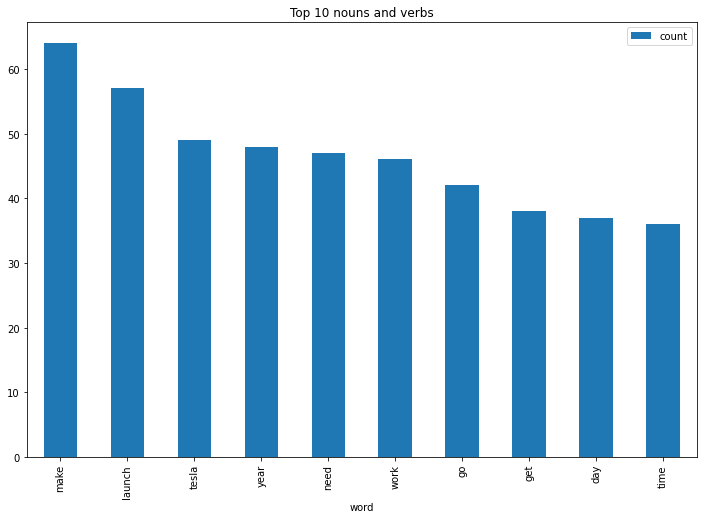

In [36]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [37]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

# Emotion mining

In [38]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df


,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [40]:

affin=pd.read_csv("Afinn.csv",encoding='latin-1')


In [41]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [42]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [43]:
calculate_sentiment(text='great')

3

In [44]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [45]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [47]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [48]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [49]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [50]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

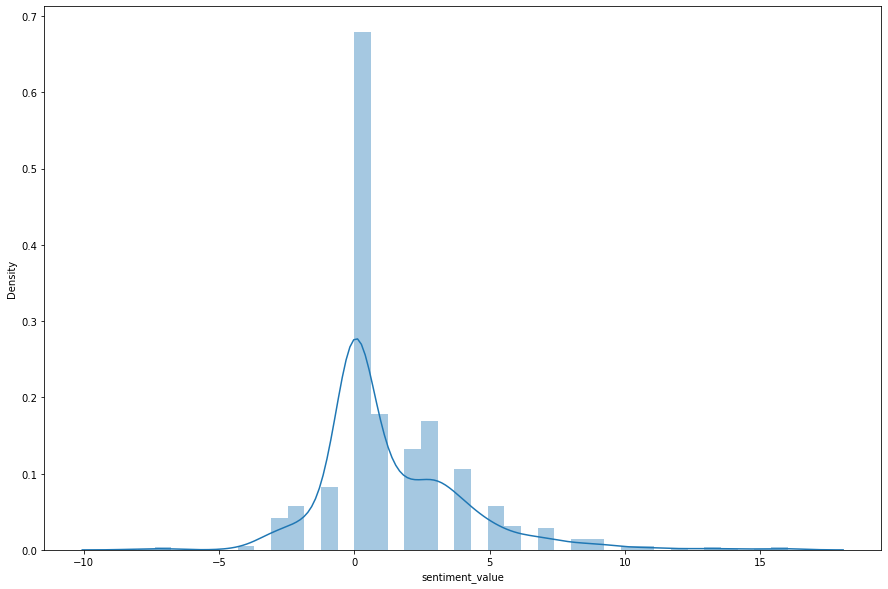

In [51]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

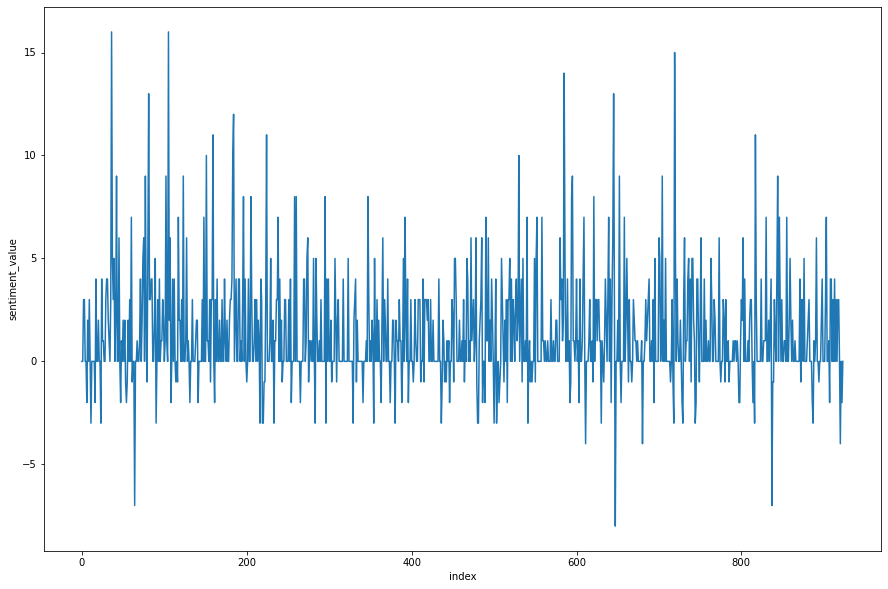

In [52]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

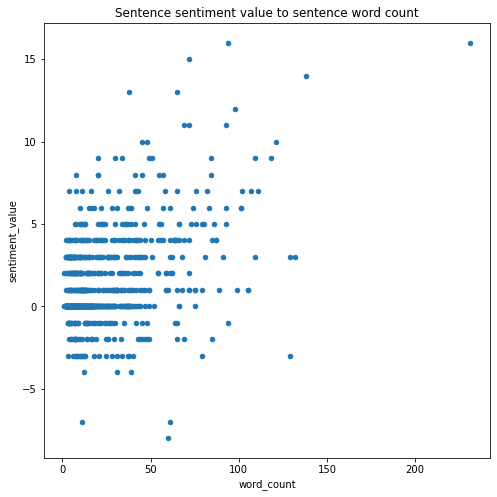

In [53]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')